In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'

In [ ]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.comp_distribs(load='results/baseline/distrib_base_v',n=100,startn=0,stats_results='results/baseline/distrib_stats')

plotdebug False
No mortality included
False
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

lisäpäivillä on 6722 henkilöä
Työllisyyden keskiarvo keskiarvo 2095342 htv, mediaani 2095864 htv std 6377 htv
keskiarvo 2265876 työllistä, mediaani 2265543 työllistä, std 6370 työllistä


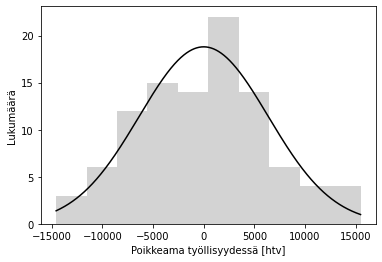

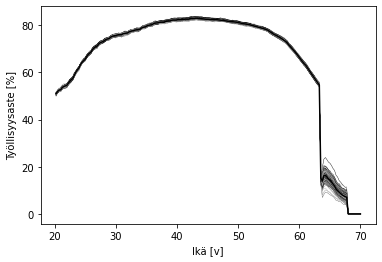

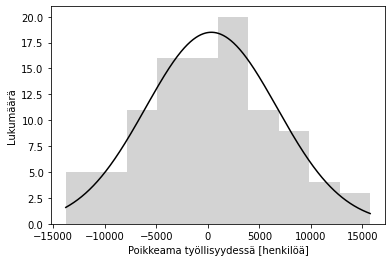

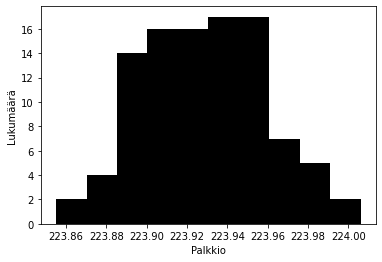

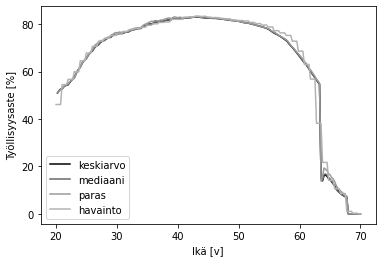

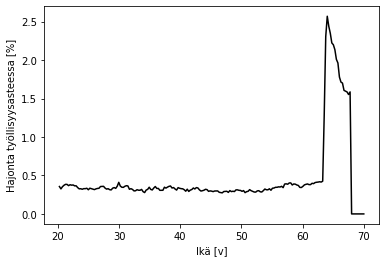

Keskikestot käytettyjen ansiosidonnaisten päivärahojen mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.77 |      0.18 |       0.05 |      0.00 |        0.00 |
| 30-39 |     0.68 |      0.22 |       0.10 |      0.00 |        0.00 |
| 40-49 |     0.68 |      0.22 |       0.10 |      0.00 |        0.00 |
| 50-59 |     0.63 |      0.23 |       0.13 |      0.01 |        0.00 |
| 60-65 |     0.31 |      0.20 |       0.17 |      0.12 |        0.20 |
+-------+----------+-----------+------------+-----------+-------------+
Keskikestot viimeisimmän työttömyysjakson mukaan
+-------+----------+-----------+------------+-----------+-------------+
|       |   0-6 kk |   6-12 kk |   12-18 kk |   18-24kk |   yli 24 kk |
|-------+----------+-----------+------------+-----------+-------------|
| 20-29 |     0.91 |     

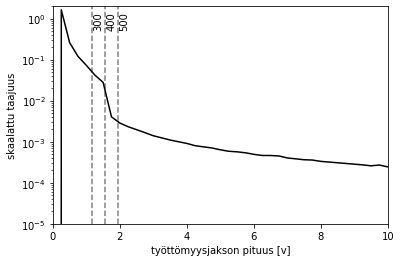

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


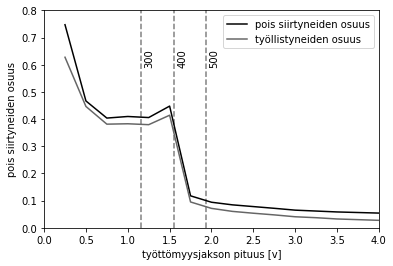

In [3]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)

cc2.render_distrib(stats_results='results/baseline/distrib_stats_updated',figname='peruskuva_')

In [ ]:
# Luottamusväli

mu=2095342
std=6377
z=1.96 # 95%
L=z*std/np.sqrt(100)
print('Luottamusväli ({:.0f};{:.0f})'.format(mu-L,mu+L))
print(L)
print(L/mu*100)

# Putken poisto

In [ ]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc2.comp_distribs(load='results/putki/distrib_poisto_v',n=100,startn=0,stats_results='results/putki/distrib_poisto_stats')
cc2.render_distrib(stats_results='results/putki/distrib_poisto_stats',figname='poisto_')
cc2.compare_distrib('results/baseline/distrib_stats_updated','results/putki/distrib_stats_poisto_updated',figname='poisto_')


In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.compare_distrib('results/baseline/distrib_stats_updated','results/putki/distrib_poisto_stats_updated')                    


In [ ]:
# Luottamusväli

mu2=mu
std2=7110
print(std2,std)
L=z*np.sqrt(std*std/100+std2*std2/100)
print('Luottamusväli ({:.0f};{:.0f})'.format(mu-L,mu+L))
print('Luottamusväli {:0f}+-{:.0f}'.format(mu,L))
print(L)

# Porrastus

In [ ]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
#cc1_porras_b.comp_distribs(load='results/porrastus/distrib_porras_v',n=100,startn=0,stats_results='results/porrastus/distrib_porras_stats')
#cc1_porras_b.render_distrib(stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.compare_distrib('results/baseline/distrib_stats_updated','results/porrastus/distrib_stats_porras_updated',figname='porrastus',label2='porrastus') 

In [ ]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats',label2='porrastus')                    

In [ ]:
# Luottamusväli

mu2=mu
std2=7424
print(std2,std)
L=z*np.sqrt(std*std/100+std2*std2/100)
print('Luottamusväli ({:.0f};{:.0f})'.format(mu-L,mu+L))
print('Luottamusväli {:0f}+-{:.0f}'.format(mu,L))
print(L)

# 12 kk TOE

In [ ]:
cc1_toe12=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_toe12.comp_distribs(load='results/toe12/distrib_toe12_v',n=14,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.render_distrib(stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')                    

# 50 pv lyhennys

In [ ]:
cc1_50_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_50_b.comp_distribs(load='results/350/distrib_350_v',n=42,startn=0,stats_results='results/350/distrib_350_stats')
cc1_50_b.render_distrib(stats_results='results/350/distrib_350_stats')
cc1_50_b.compare_distrib('results/baseline/distrib_stats','results/350/distrib_350_stats')                    

# Porrastus ilman vaikutusta putkeen

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.comp_distribs(load='results/porrastus_eiputki/distrib_porras_v',n=13,startn=0,stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.render_distrib(stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

In [ ]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_eiputki/distrib_porras_stats',label1='porras',label2='porras, ei putki')

# Porrasta vain 1 askel

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
#cc2_porras_b.comp_distribs(load='results/porrastus_1askel/distrib_porras_v',n=6,startn=0,stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.render_distrib(stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_1askel/distrib_porras_stats',figname='porrastus_')

In [ ]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_1askel/distrib_porras_stats',label1='porras',label2='porras, 1 askel')

# Laskelmia epävarmuuksista

In [ ]:
# Epävarmuus

perusmalli_std=6377
vaihtoehto_std=7424
n=100

std_diff=np.sqrt(perusmalli_std**2/n+vaihtoehto_std**2/n)
print('Porrastusen epävarmuus',std_diff)

In [ ]:
# Epävarmuus

perusmalli_std=6377
vaihtoehto_std=7110
n=100

std_diff=np.sqrt(perusmalli_std**2/n+vaihtoehto_std**2/n)
print('Putken poiston epävarmuus',std_diff)

# testejä

In [ ]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1.comp_distribs(load='results/baseline/distrib_base_v',n=100,startn=0,stats_results='results/baseline/distrib_stats_b')
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc2.comp_distribs(load='results/putki/distrib_poisto_v',n=100,startn=0,stats_results='results/putki/distrib_poisto_stats_b')
cc2.compare_distrib('results/baseline/distrib_stats_b','results/putki/distrib_poisto_stats_b')



In [ ]:
1250/2094092*100